In [17]:
import rnnSMAP
import numpy as np
import pandas as pd
import torch
import argparse

import imp
imp.reload(rnnSMAP)
rnnSMAP.reload()

opt = rnnSMAP.classLSTM.optLSTM(
    rootDB=rnnSMAP.kPath['DB_L3_NA'],
    rootOut=rnnSMAP.kPath['Out_L3_NA'],
    syr=2017, eyr=2017,
    var='varLst_Forcing', varC='varConstLst_Noah',
    train='CONUSv16f1', dr=0.5, modelOpt='relu',
    target='SMAP_AM',gpu=0
)

load rnnSMAP


In [18]:
opt['model'] = 'my'
opt['out'] = 'my_stack_wt_update'
rnnSMAP.funLSTM.trainLSTM(opt)

out = opt['out']
rootOut = rnnSMAP.kPath['Out_L3_NA']
syr = 2015
eyr = 2016

/Users/rajdesai/Desktop/Hydro/data/Daily_L3_NA/Subset/CONUSv16f1.csv
read /Users/rajdesai/Desktop/Hydro/data/Daily_L3_NA/CONUSv16f1/2017/APCP_FORA.csv 0.02877211570739746
read /Users/rajdesai/Desktop/Hydro/data/Daily_L3_NA/CONUSv16f1/2017/DLWRF_FORA.csv 0.024355173110961914
read /Users/rajdesai/Desktop/Hydro/data/Daily_L3_NA/CONUSv16f1/2017/DSWRF_FORA.csv 0.018947839736938477
read /Users/rajdesai/Desktop/Hydro/data/Daily_L3_NA/CONUSv16f1/2017/TMP_2_FORA.csv 0.015519142150878906
read /Users/rajdesai/Desktop/Hydro/data/Daily_L3_NA/CONUSv16f1/2017/SPFH_2_FORA.csv 0.016000032424926758
read /Users/rajdesai/Desktop/Hydro/data/Daily_L3_NA/CONUSv16f1/2017/VGRD_10_FORA.csv 0.01595306396484375
read /Users/rajdesai/Desktop/Hydro/data/Daily_L3_NA/CONUSv16f1/2017/UGRD_10_FORA.csv 0.017657995223999023
read /Users/rajdesai/Desktop/Hydro/data/Daily_L3_NA/CONUSv16f1/2017/SMAP_AM.csv 0.015086174011230469
<generator object Module.parameters at 0x10e278f10>
torch.Size([100, 256]) torch.Size([100, 256])
to

RuntimeError: The size of tensor a (100) must match the size of tensor b (256) at non-singleton dimension 1

In [5]:
out = 'my_stack_wt_update'
testName = 'CONUSv16f1'
rootDB = rnnSMAP.kPath['DB_L3_NA']
rootOut = rnnSMAP.kPath['Out_L3_NA']

In [6]:
ds1 = rnnSMAP.classDB.DatasetPost(rootDB=rootDB, subsetName=testName, yrLst=[2017])# define dataset
ds1.readData(var='SMAP_AM', field='SMAP')# read target
ds1.readPred(rootOut=rootOut, out=out, drMC=0, field='LSTM')# read prediction
statErr1 = ds1.statCalError(predField='LSTM', targetField='SMAP')# calculate error

/Users/rajdesai/Desktop/Hydro/data/Daily_L3_NA/Subset/CONUSv16f1.csv
read /Users/rajdesai/Desktop/Hydro/data/Daily_L3_NA/CONUSv16f1/2017/SMAP_AM.csv 0.029122114181518555
running test
/Users/rajdesai/Desktop/Hydro/data/Daily_L3_NA/Subset/CONUSv16f1.csv
read /Users/rajdesai/Desktop/Hydro/data/Daily_L3_NA/CONUSv16f1/2017/APCP_FORA.csv 0.01997685432434082
read /Users/rajdesai/Desktop/Hydro/data/Daily_L3_NA/CONUSv16f1/2017/DLWRF_FORA.csv 0.017607927322387695
read /Users/rajdesai/Desktop/Hydro/data/Daily_L3_NA/CONUSv16f1/2017/DSWRF_FORA.csv 0.020591020584106445
read /Users/rajdesai/Desktop/Hydro/data/Daily_L3_NA/CONUSv16f1/2017/TMP_2_FORA.csv 0.0249478816986084
read /Users/rajdesai/Desktop/Hydro/data/Daily_L3_NA/CONUSv16f1/2017/SPFH_2_FORA.csv 0.017921924591064453
read /Users/rajdesai/Desktop/Hydro/data/Daily_L3_NA/CONUSv16f1/2017/VGRD_10_FORA.csv 0.018288850784301758
read /Users/rajdesai/Desktop/Hydro/data/Daily_L3_NA/CONUSv16f1/2017/UGRD_10_FORA.csv 0.017613887786865234


/usr/local/lib/python3.6/site-packages/torch/serialization.py:425: SourceChangeWarning: source code of class 'rnnSMAP.classLSTM.torchLSTM_cell_my_implementation' has changed. you can retrieve the original source code by accessing the object's source attribute or set `torch.nn.Module.dump_patches = True` and use the patch tool to revert the changes.
  warnings.warn(msg, SourceChangeWarning)


saving /Users/rajdesai/Desktop/Hydro/output/L3_NA/my_stack_adadelta/test_CONUSv16f1_2017_2017_ep500.csv
reading /Users/rajdesai/Desktop/Hydro/output/L3_NA/my_stack_adadelta/test_CONUSv16f1_2017_2017_ep500.csv


In [7]:
ds2 = rnnSMAP.classDB.DatasetPost(rootDB=rootDB, subsetName=testName, yrLst=[2015, 2016])
ds2.readData(var='SMAP_AM', field='SMAP')
ds2.readPred(rootOut=rootOut, out=out, drMC=0, field='LSTM')
statErr2 = ds2.statCalError(predField='LSTM', targetField='SMAP')

/Users/rajdesai/Desktop/Hydro/data/Daily_L3_NA/Subset/CONUSv16f1.csv
read /Users/rajdesai/Desktop/Hydro/data/Daily_L3_NA/CONUSv16f1/2015/SMAP_AM.csv 0.03558683395385742
read /Users/rajdesai/Desktop/Hydro/data/Daily_L3_NA/CONUSv16f1/2016/SMAP_AM.csv 0.024817943572998047
running test
/Users/rajdesai/Desktop/Hydro/data/Daily_L3_NA/Subset/CONUSv16f1.csv
read /Users/rajdesai/Desktop/Hydro/data/Daily_L3_NA/CONUSv16f1/2015/APCP_FORA.csv 0.015636920928955078
read /Users/rajdesai/Desktop/Hydro/data/Daily_L3_NA/CONUSv16f1/2016/APCP_FORA.csv 0.015462160110473633
read /Users/rajdesai/Desktop/Hydro/data/Daily_L3_NA/CONUSv16f1/2015/DLWRF_FORA.csv 0.01694798469543457
read /Users/rajdesai/Desktop/Hydro/data/Daily_L3_NA/CONUSv16f1/2016/DLWRF_FORA.csv 0.017302989959716797
read /Users/rajdesai/Desktop/Hydro/data/Daily_L3_NA/CONUSv16f1/2015/DSWRF_FORA.csv 0.018294095993041992
read /Users/rajdesai/Desktop/Hydro/data/Daily_L3_NA/CONUSv16f1/2016/DSWRF_FORA.csv 0.02414393424987793
read /Users/rajdesai/Desktop

/usr/local/lib/python3.6/site-packages/torch/serialization.py:425: SourceChangeWarning: source code of class 'rnnSMAP.classLSTM.torchLSTM_cell_my_implementation' has changed. you can retrieve the original source code by accessing the object's source attribute or set `torch.nn.Module.dump_patches = True` and use the patch tool to revert the changes.
  warnings.warn(msg, SourceChangeWarning)


saving /Users/rajdesai/Desktop/Hydro/output/L3_NA/my_stack_adadelta/test_CONUSv16f1_2015_2016_ep500.csv
reading /Users/rajdesai/Desktop/Hydro/output/L3_NA/my_stack_adadelta/test_CONUSv16f1_2015_2016_ep500.csv


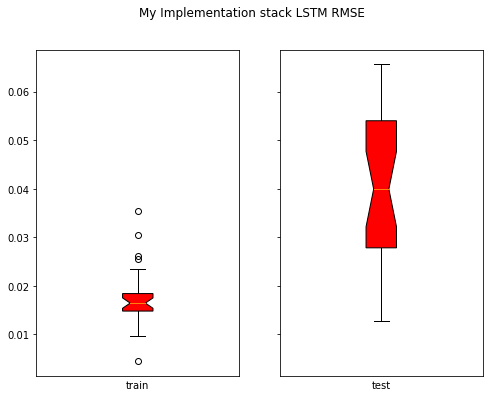

In [9]:
strE = 'RMSE'
dataErr = [getattr(statErr1, strE), getattr(statErr2, strE)]
fig = rnnSMAP.funPost.plotBox(dataErr, labelC=['train', 'test'], title='My Implementation stack LSTM ' + strE)